In [103]:
import numpy as np
import pandas as pd
import math
from xgboost.sklearn import XGBRegressor
import sklearn
from sklearn import neighbors, tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing  import  StandardScaler
%matplotlib inline
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense

# Читаем данные

In [88]:
data = pd.read_csv('Houses/train.csv')
test_data = pd.read_csv('Houses/test.csv')

In [89]:
data

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
5,6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,...,62,14,1,53,78,1,20,113,17,9100000
6,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,...,81,16,3,38,80,1,27,127,8,5500000
7,8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,11,18,1,0,47,4,2000000
8,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,...,19,8,1,18,34,1,3,85,11,5300000
9,10,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,...,19,13,0,10,20,1,3,67,1,2000000


# Делим данные на категорические и числовые

In [90]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']

# Заполняем отсутсвующие данные самым часто встречающимся элементом

In [105]:
data_describe = data.describe(include=[object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])
# data_describe = data.describe(include=[float])
# for i in numerical_columns:
#     data[i] = data[i].fillna(data_describe[i]['top'])

# Применяем WordNbanding к категорическим данным и соеденяем данные обратно

In [106]:
data_categorical = pd.get_dummies(data[categorical_columns])
train_data = pd.concat((data_categorical, data[numerical_columns]), axis=1)

In [107]:
print(data_categorical.shape)

(30471, 1338)


In [108]:
I = sklearn.preprocessing.Imputer(missing_values=float('nan'),strategy='mean',axis=0)
X_num = I.fit_transform(data[numerical_columns])

In [109]:
Results_data = np.array(test_data)
scaler = StandardScaler()
scaler.fit(X_num)
X_cat = np.array(data_categorical)
X = np.concatenate((X_num[:,1:-1], X_cat), axis=1)
y = np.array(X_num)[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

In [110]:
print(X_train[:,0])

[37. 38. 63. ... 79. 47. 64.]


# Модель DecisionTree

In [101]:
clf = tree.DecisionTreeRegressor(max_depth = 6)
clf.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [102]:
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score is: ',train_score, 'test score is: ', test_score )

train score is:  0.6741341910502096 test score is:  0.5635450700323592


# Модель XGBoost 

In [98]:
model = XGBRegressor(max_depth = 7)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [99]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('train score is: ',train_score, 'test score is: ', test_score )

train score is:  0.8794512752729047 test score is:  0.6815636311257842


# График значимости признаков

[]

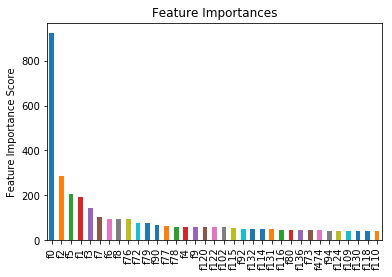

In [100]:
feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)[0:35]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.plot()

# Персептрон

In [111]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [113]:
model.fit(X_train, y_train, epochs=100, batch_size=15, verbose=2)

Epoch 1/100
 - 84s - loss: 23957654857503.1367 - mean_absolute_error: 3170624.1200
Epoch 2/100
 - 927s - loss: 25628425671555.6875 - mean_absolute_error: 2966413.3370
Epoch 3/100
 - 52s - loss: 24692987056241.4297 - mean_absolute_error: 2893734.5785
Epoch 4/100
 - 61s - loss: 23131492898802.1367 - mean_absolute_error: 2855130.3611
Epoch 5/100
 - 83s - loss: 23889629152518.7695 - mean_absolute_error: 2824637.7415
Epoch 6/100
 - 82s - loss: 23925512158507.8164 - mean_absolute_error: 2803574.5625
Epoch 7/100
 - 83s - loss: 22781130770783.5898 - mean_absolute_error: 2796308.3990
Epoch 8/100
 - 83s - loss: 25936256448504.2188 - mean_absolute_error: 2781357.4764
Epoch 9/100
 - 82s - loss: 23390235968157.8320 - mean_absolute_error: 2760251.5649
Epoch 10/100
 - 82s - loss: 24070898490911.7148 - mean_absolute_error: 2757932.8911
Epoch 11/100
 - 82s - loss: 22596385213871.9922 - mean_absolute_error: 2744107.0329
Epoch 12/100
 - 83s - loss: 21671101402714.4570 - mean_absolute_error: 2733924.8392


Epoch 99/100
 - 57s - loss: 17603687050475.7852 - mean_absolute_error: 2558883.5090
Epoch 100/100
 - 63s - loss: 17435177455856.9297 - mean_absolute_error: 2560180.0618


In [116]:
model.evaluate(X_test, y_test, verbose=0)

[19243010028078.453, 2624186.6981132077]